In [1]:
import sys
import pathlib
import numpy as np

In [2]:
%pip install scikit-learn
%pip install matplotlib
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
digits = sk.datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [4]:
print(digits.data.shape)
print(len(digits.feature_names))

(1797, 64)
64


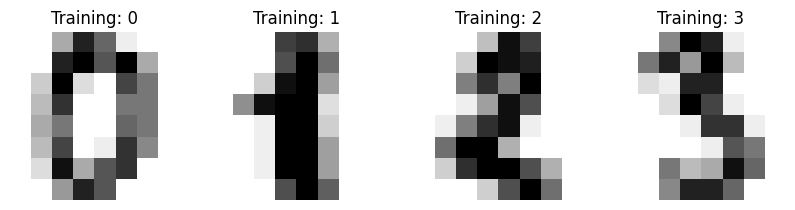

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [6]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 80% train and 20% test subsets
X_train, X_val, y_train, y_val = train_test_split(
    data, digits.target, test_size=0.2, shuffle=True
)

In [7]:
import nn

nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}]

autoencoder = nn.NeuralNetwork(nn_arch, lr=0.05, seed=42, batch_size=100, epochs=10, loss_function='binary cross entropy')

In [8]:
autoencoder.fit(X_train, y_train, X_val, y_val)

W_curr dim is:  (16, 64)
W_curr dim is:  (64, 16)
A_curr is:  [[1 1 1 ... 0 1 0]
 [1 0 1 ... 0 1 0]
 [1 1 1 ... 0 1 0]
 ...
 [1 0 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 0]]
y len:  96
y_hat len:  96
y_hat:  [[9.99999999e-01 9.99999999e-01 9.99999999e-01 ... 1.00000000e-09
  9.99999999e-01 1.00000000e-09]
 [9.99999999e-01 1.00000000e-09 9.99999999e-01 ... 1.00000000e-09
  9.99999999e-01 1.00000000e-09]
 [9.99999999e-01 9.99999999e-01 9.99999999e-01 ... 1.00000000e-09
  9.99999999e-01 1.00000000e-09]
 ...
 [9.99999999e-01 1.00000000e-09 9.99999999e-01 ... 1.00000000e-09
  9.99999999e-01 9.99999999e-01]
 [9.99999999e-01 9.99999999e-01 9.99999999e-01 ... 1.00000000e-09
  9.99999999e-01 9.99999999e-01]
 [9.99999999e-01 9.99999999e-01 9.99999999e-01 ... 9.99999999e-01
  9.99999999e-01 1.00000000e-09]]
W_curr dim is:  (16, 64)
W_curr dim is:  (64, 16)
A_curr is:  [[1 1 1 ... 0 1 0]
 [1 0 1 ... 0 1 0]
 [1 1 1 ... 0 1 0]
 ...
 [1 0 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 0]]
dA

ValueError: shapes (16,64) and (96,64) not aligned: 64 (dim 1) != 96 (dim 0)